In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.metrics import accuracy_score,recall_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


## 1) Problem Statement

In [ ]:
on the basis of heart disease data we have to predict that person having
heart disease presence or absence by using the following parameter:
            Age	
            Sex
            Chest pain type	
            BP	
            Cholesterol
            FBS over 120	
            EKG results	
            Max HR	
            Exercise angina	
            ST depression	
            Slope of ST	
            Number of vessels fluro	
            Thallium	
          

## 2) Data Gathering

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [3]:
# as heart disease column is object we have converted it into integer datatype
df["Heart Disease"] = df["Heart Disease"].replace({"Presence":1,"Absence":0})
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


## 3) EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### 3.1) Age

In [6]:
df["Age"]

0      70
1      67
2      57
3      64
4      74
       ..
265    52
266    44
267    56
268    57
269    67
Name: Age, Length: 270, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Density'>

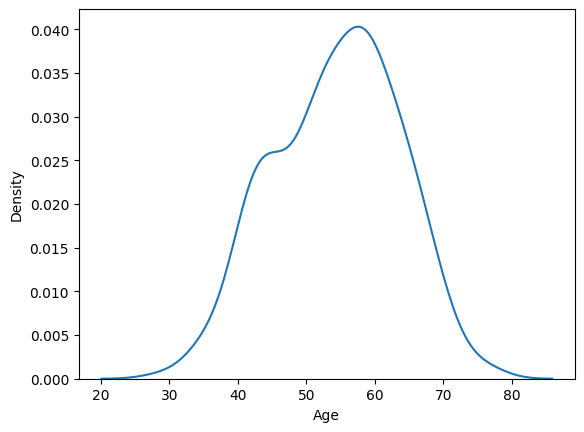

In [7]:
sns.kdeplot(df["Age"])

In [8]:
df["Age"].skew()

-0.16361522733654557

<AxesSubplot: xlabel='Age'>

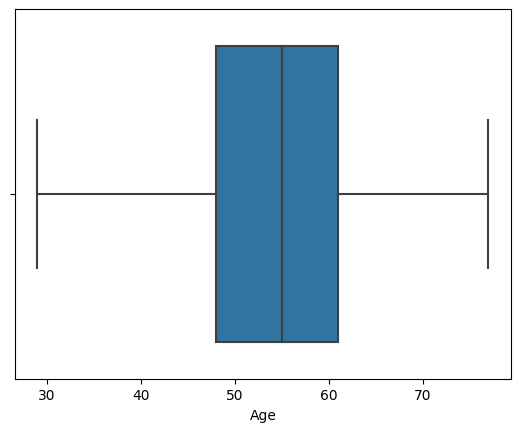

In [9]:
sns.boxplot(x = df["Age"])

In [10]:
# age column is already preprocesed and it dosesn't contains any outliers

### 3.2) sex

In [11]:
df["Sex"].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [12]:
# no preprocessing required on sex column

### 3.3) Chest pain type

In [13]:
df["Chest pain type"].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

### 3.4) BP

In [14]:
df["BP"].isna().sum()

0

### 3.5) Cholesterol

In [15]:
df["Cholesterol"].max()

564

In [17]:
df["Cholesterol"].min()

126

### 3.6) FBS over 120

In [18]:
df["FBS over 120"].value_counts()

0    230
1     40
Name: FBS over 120, dtype: int64

### 3.7) Max HR

In [19]:
df["Max HR"].max()

202

In [20]:
df["Max HR"].min()

71

### 3.8) Exercise angina

In [21]:
 df["Exercise angina"].value_counts()

0    181
1     89
Name: Exercise angina, dtype: int64

## 3.9) ST depression

In [22]:
df["ST depression"].max()

6.2

In [23]:
df["ST depression"].min()

0.0

## 3.10) Slope of ST

In [20]:
df["Slope of ST"].value_counts()

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

### 3.11) Number of vessels fluro

In [21]:
df["Number of vessels fluro"].value_counts()

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

### 3.12) Thallium

In [22]:
df["Thallium"].value_counts()

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

### 4) Feature Selection

In [24]:
df.rename({'Chest pain type': 'Chest_pain_type', 'FBS over 120':'FBS_over_120',
          'EKG results':'EKG_results', 'Max HR':"Max_HR",'Exercise angina':"Exercise_angina",
           'ST depression':"ST_depression", 'Slope of ST':'Slope_of_ST', 
           'Number of vessels fluro':'Number_of_vessels_fluro', 
           'Heart Disease': 'Heart_Disease' }, axis=1, inplace=True)
df

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [25]:
## no multicolinearity
vif_list = []
for i in range(df.shape[1] - 1):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)
    print(f"Vif for {df.columns[i]} : {vif}")

Vif for Age : 41.19972381823246
Vif for Sex : 3.9955370482368924
Vif for Chest_pain_type : 14.495315676166701
Vif for BP : 60.806621743266454
Vif for Cholesterol : 27.8505444562818
Vif for FBS_over_120 : 1.2627120123037072
Vif for EKG_results : 2.2571510574439526
Vif for Max_HR : 36.5623365074192
Vif for Exercise_angina : 2.0741026983412905
Vif for ST_depression : 3.361991095424895
Vif for Slope_of_ST : 12.387604391369667
Vif for Number_of_vessels_fluro : 2.195494197791911
Vif for Thallium : 11.188453427014972


## 5) Model Training

In [26]:
x = df.drop('Heart_Disease',axis = 1)
y = df['Heart_Disease']

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25, random_state=22)
x_train

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium
198,69,0,1,140,239,0,0,151,0,1.8,1,2,3
241,39,1,3,140,321,0,2,182,0,0.0,1,0,3
173,68,0,3,120,211,0,2,115,0,1.5,2,0,3
55,41,0,2,105,198,0,0,168,0,0.0,1,1,3
130,63,0,4,108,269,0,0,169,1,1.8,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,44,1,4,112,290,0,2,153,0,0.0,1,1,3
14,57,0,4,128,303,0,2,159,0,0.0,1,1,3
146,52,1,4,112,230,0,0,160,0,0.0,1,1,3
84,57,1,4,110,201,0,0,126,1,1.5,2,0,6


In [27]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

## 6) Evaluation Matrix

#### evalution for training data

In [28]:
y_pred_train = log_reg.predict(x_train)
print("Confusion matrix for training data :\n",confusion_matrix(y_train,y_pred_train))


Confusion matrix for training data :
 [[103  11]
 [ 17  71]]


In [29]:
print("Classification report for the training data:\n",classification_report(y_train,y_pred_train))

Classification report for the training data:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       114
           1       0.87      0.81      0.84        88

    accuracy                           0.86       202
   macro avg       0.86      0.86      0.86       202
weighted avg       0.86      0.86      0.86       202



### evaluation for testing data

In [30]:
y_pred_test = log_reg.predict(x_test)
print("Confusion matrix for training data :\n",confusion_matrix(y_test,y_pred_test))


Confusion matrix for training data :
 [[34  2]
 [ 6 26]]


In [31]:
print("Classification Report for Test:\n",classification_report(y_test,y_pred_test))

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.93      0.81      0.87        32

    accuracy                           0.88        68
   macro avg       0.89      0.88      0.88        68
weighted avg       0.89      0.88      0.88        68



## Linearity

In [32]:
y_train_pred_prob = log_reg.predict_proba(x_train)


In [33]:
new_df = x_train.copy()


In [34]:
p = y_train_pred_prob[:,1]
log_odds = np.log(p/(1-p))
new_df['Log_Odds'] = log_odds

<AxesSubplot: >

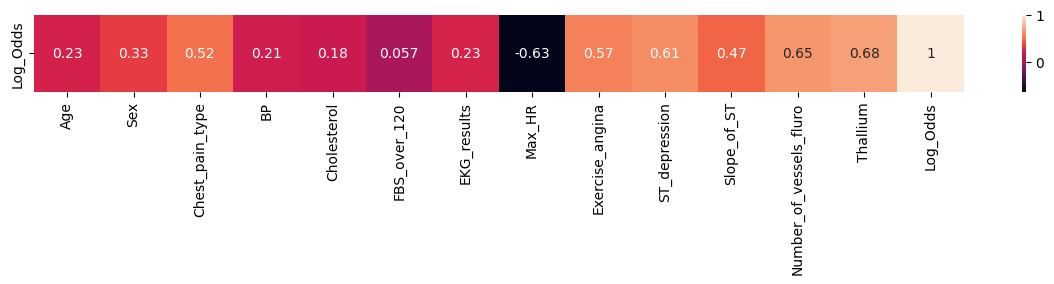

In [35]:
plt.figure(figsize=(15,1))
sns.heatmap(new_df.corr().tail(1),annot = True)

## 7)  Web Framework 

In [36]:
col = x_train.columns.tolist()
col


['Age',
 'Sex',
 'Chest_pain_type',
 'BP',
 'Cholesterol',
 'FBS_over_120',
 'EKG_results',
 'Max_HR',
 'Exercise_angina',
 'ST_depression',
 'Slope_of_ST',
 'Number_of_vessels_fluro',
 'Thallium']

In [37]:
project_data = {'Sex':{'male': 1, "female": 0},
                "Chest_pain_type" :{ "typical angina" :1,"atypical angina" :2,"non-anginal pain":3,
                "asymptomatic":4},
                "FBS_over_120" :{">120":1,"<120":0},
                "Exercise_angina" :{"yes":1,"no":0},
                "Slope_of_ST" :{"upsloping":1,"flat":2,"downsloping":3},
                "Thallium" :{"normal":3,"fixed defect":6,"reversable defect":7},
                'Columns':col}
project_data

{'Sex': {'male': 1, 'female': 0},
 'Chest_pain_type': {'typical angina': 1,
  'atypical angina': 2,
  'non-anginal pain': 3,
  'asymptomatic': 4},
 'FBS_over_120': {'>120': 1, '<120': 0},
 'Exercise_angina': {'yes': 1, 'no': 0},
 'Slope_of_ST': {'upsloping': 1, 'flat': 2, 'downsloping': 3},
 'Thallium': {'normal': 3, 'fixed defect': 6, 'reversable defect': 7},
 'Columns': ['Age',
  'Sex',
  'Chest_pain_type',
  'BP',
  'Cholesterol',
  'FBS_over_120',
  'EKG_results',
  'Max_HR',
  'Exercise_angina',
  'ST_depression',
  'Slope_of_ST',
  'Number_of_vessels_fluro',
  'Thallium']}

In [38]:
df.

SyntaxError: invalid syntax (791285630.py, line 1)

In [52]:
Age                        = 67
Sex                        =  "female"
Chest_pain_type             = "non-anginal pain"
BP                         =115
Cholesterol                =564
FBS_over_120                = "<120"
EKG_results                  =2
Max_HR                     =160
Exercise_angina             = "no"
ST_depression                =1.6
Slope_of_ST                 = "flat"
Number_of_vessels_fluro      =0
Thallium                     = "reversable defect"

Sex = project_data["Sex"][Sex]
Chest_pain_type = project_data["Chest_pain_type"][Chest_pain_type]
FBS_over_120 = project_data["FBS_over_120"][FBS_over_120]
Exercise_angina = project_data["Exercise_angina"][Exercise_angina]
Thallium = project_data["Thallium"][Thallium]
Slope_of_ST = project_data["Slope_of_ST"][Slope_of_ST]


columns =len(project_data["Columns"])
test_array = np.zeros(columns)

test_array[0] = Age
test_array[1] = Sex 
test_array[2] = Chest_pain_type
test_array[3] = BP
test_array[4] = Cholesterol
test_array[5] = FBS_over_120
test_array[6] = EKG_results
test_array[7] = Max_HR                     
test_array[8] = Exercise_angina
test_array[9] = ST_depression
test_array[10] = Slope_of_ST
test_array[11] = Number_of_vessels_fluro
test_array[12] = Thallium

print("test array :",test_array)

def get_prediction(x):
    predict_value = log_reg.predict([x])[0]
    print("The Prediction is:",predict_value)
    
get_prediction(test_array)    

test array : [ 67.    0.    3.  115.  564.    0.    2.  160.    0.    1.6   2.    0.
   7. ]
The Prediction is: 0


In [53]:
import pickle

with open("model.pkl","wb") as f:
    pickle.dump(log_reg,f)

In [54]:
import json

with open("project_data","w") as f:
    json.dump(project_data,f)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest_pain_type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS_over_120             270 non-null    int64  
 6   EKG_results              270 non-null    int64  
 7   Max_HR                   270 non-null    int64  
 8   Exercise_angina          270 non-null    int64  
 9   ST_depression            270 non-null    float64
 10  Slope_of_ST              270 non-null    int64  
 11  Number_of_vessels_fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart_Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m